In [3]:
import Picoquant_PL as pl
import os
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 1\Microscope\2022-01-21\dlandbulk.sptw')
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_scalebar.scalebar import ScaleBar
from copy import copy
import glob
from scipy.optimize import curve_fit

# Import using Picoquant_PL

Note the use of Picoquant_PL- more info can be found in the the relevent folder

 - Loading 'plottable\bulk1.ptu' ... 
 [DONE]



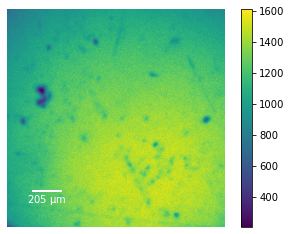

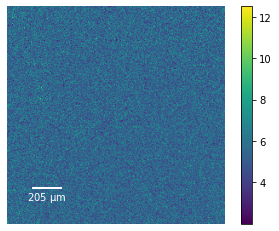

 - Loading 'plottable\bulk_bp4.ptu' ... 
 [DONE]



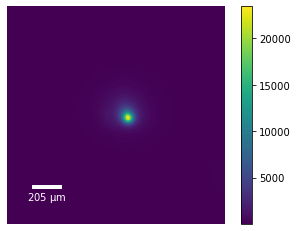

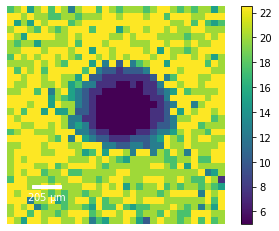

In [4]:
filelist = glob.glob("plottable/*.ptu")     #Plottable is where I have pllaced all the data I wanted to plot, confocal and bp
bp_filelist = [x for x in filelist if "bp" in x]        #find the files containing bp
filelist = [x for x in filelist if 'bp' not in x]       #find the files that are confocal


data, tags = pl.import_convert('plottable\\bulk1', detector=1)
pl_array, scale_bar_len_um, scale_bar_len_pixels = pl.plot_pl(data, tags)

_1e_times = pl.plot_1e_time(data, tags,time_binning = 10, shape_binning = 1)

data1, tags1 = pl.import_convert('plottable\\bulk_bp4', detector=1)
pl_array1, scale_bar_len_um1, scale_bar_len_pixels1 = pl.plot_pl(data1, tags1)
_1e_times_bp = pl.plot_1e_time(data1, tags1,time_binning = 100, shape_binning = 4)

# Plot

Note B not very good far away from laser spot due to high signal to noise atrificially increasing lifetime

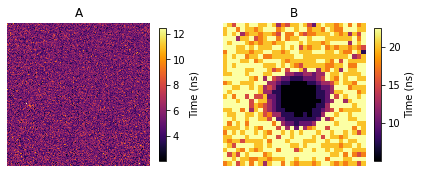

In [7]:
fig, axs = plt.subplots(1,2)
ax=axs[0]
pcm = ax.pcolormesh(_1e_times)
ax.set_aspect(aspect=1)
pcm.set_cmap('inferno')
fig.colorbar(pcm, ax=ax, label ='Time (ns)',shrink=0.5)
ax.axis('off')
ax.set_title('A')
ax=axs[1]
pcm = ax.pcolormesh(_1e_times_bp)
ax.set_aspect(aspect=1)
pcm.set_cmap('inferno')
fig.colorbar(pcm, ax=ax, label ='Time (ns)',shrink=0.5)
ax.axis('off')
ax.set_title('B')

plt.tight_layout()
plt.show()
#plt.savefig('bulk_time.png', dpi=1000)